<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W5D2_DailyChallenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 64.5MB/s]


In [3]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb_top_1000.csv       


In [19]:
import pandas as pd
top_movies = pd.read_csv('imdb_top_1000.csv')
print(top_movies)
print(top_movies.isnull().sum())
top_movies.dropna(inplace=True)
print(top_movies.isnull().sum())
# top_movies['Released_Year'] = pd.to_datetime(top_movies['Released_Year'])
unique_values = top_movies['Released_Year'].unique()
print(unique_values)
pg_rows = top_movies[top_movies['Released_Year'] == 'PG']
print(pg_rows)
top_movies['Released_Year'] = top_movies['Released_Year'].replace('PG', 1995)
unique_values = top_movies['Released_Year'].unique()
print(unique_values)
top_movies['Released_Year'] = pd.to_datetime(top_movies['Released_Year'])
# unique_values = top_movies['Genre'].unique()
# print(unique_values)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II  

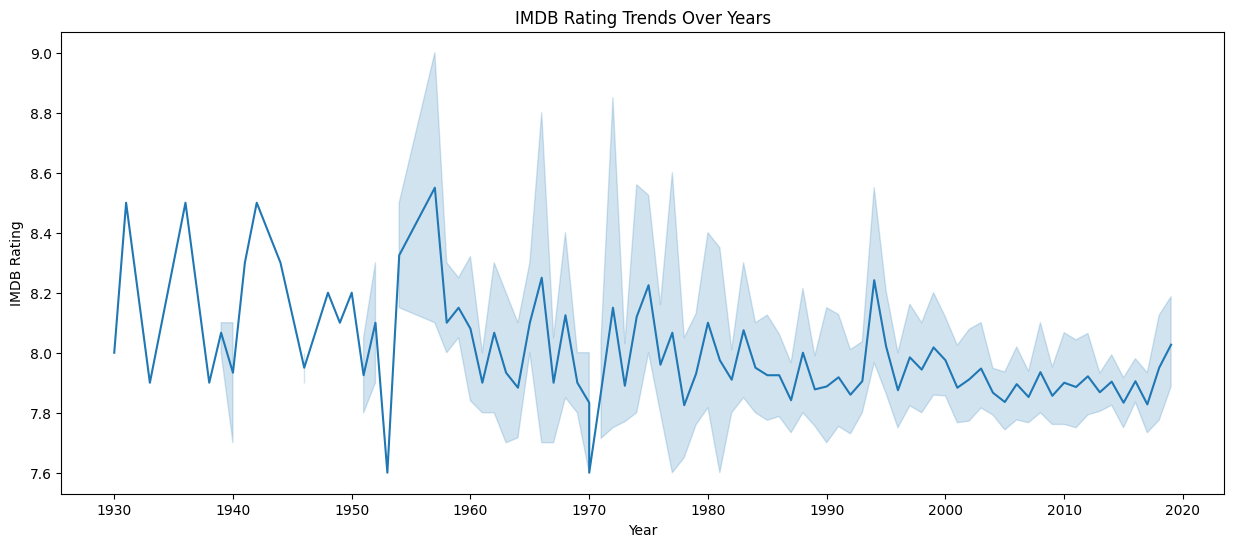

In [18]:
# line plot with Matplotlib showing trends in IMDB_Rating over the years
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.lineplot(data=top_movies, x='Released_Year', y='IMDB_Rating')
plt.title('IMDB Rating Trends Over Years')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.show()

<ipython-input-29-3d5a7ef93459>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_movies, y='Genre', palette="husl")


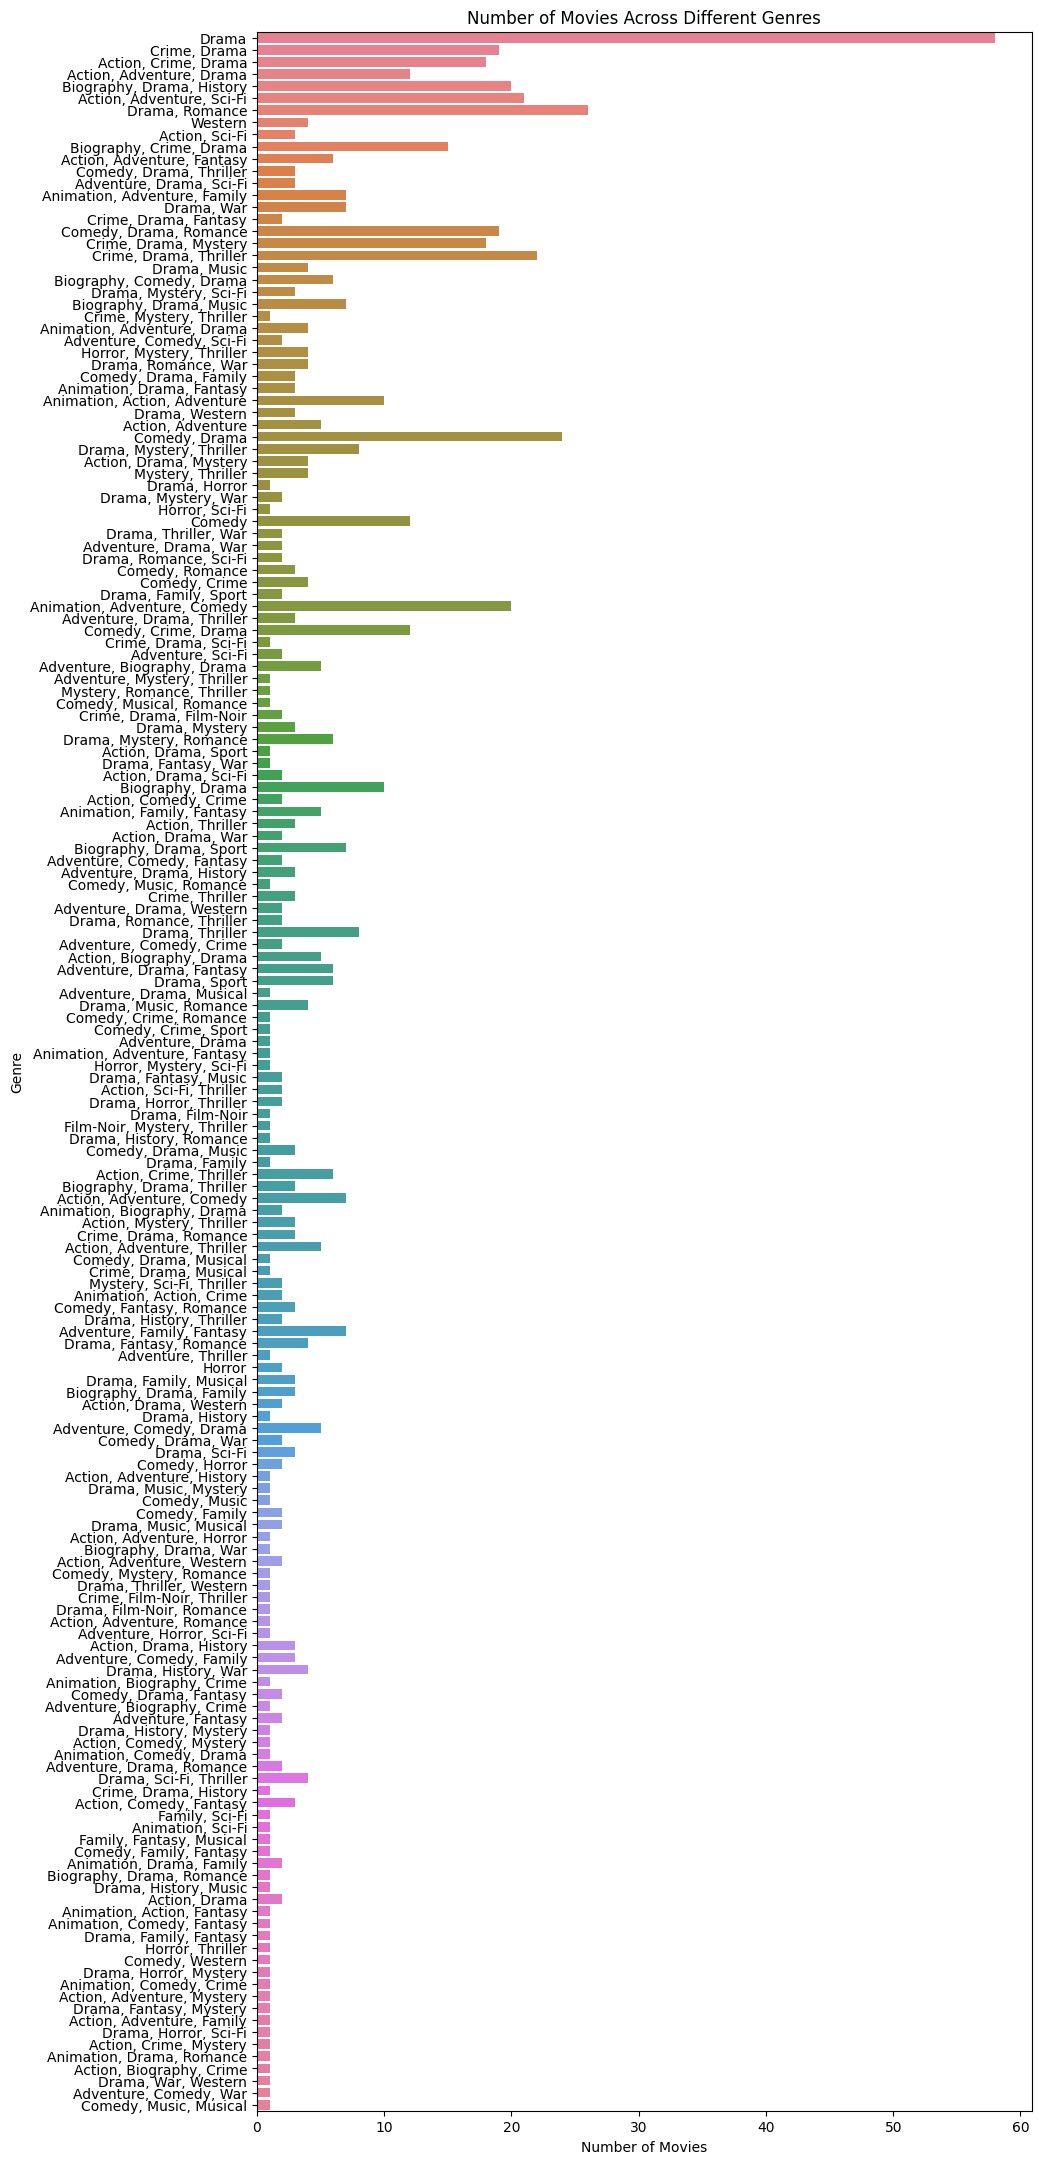

In [29]:
# a Seaborn bar plot to compare the number of movies across different genres

plt.figure(figsize=(10, 27))
sns.countplot(data=top_movies, y='Genre', palette="husl")
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

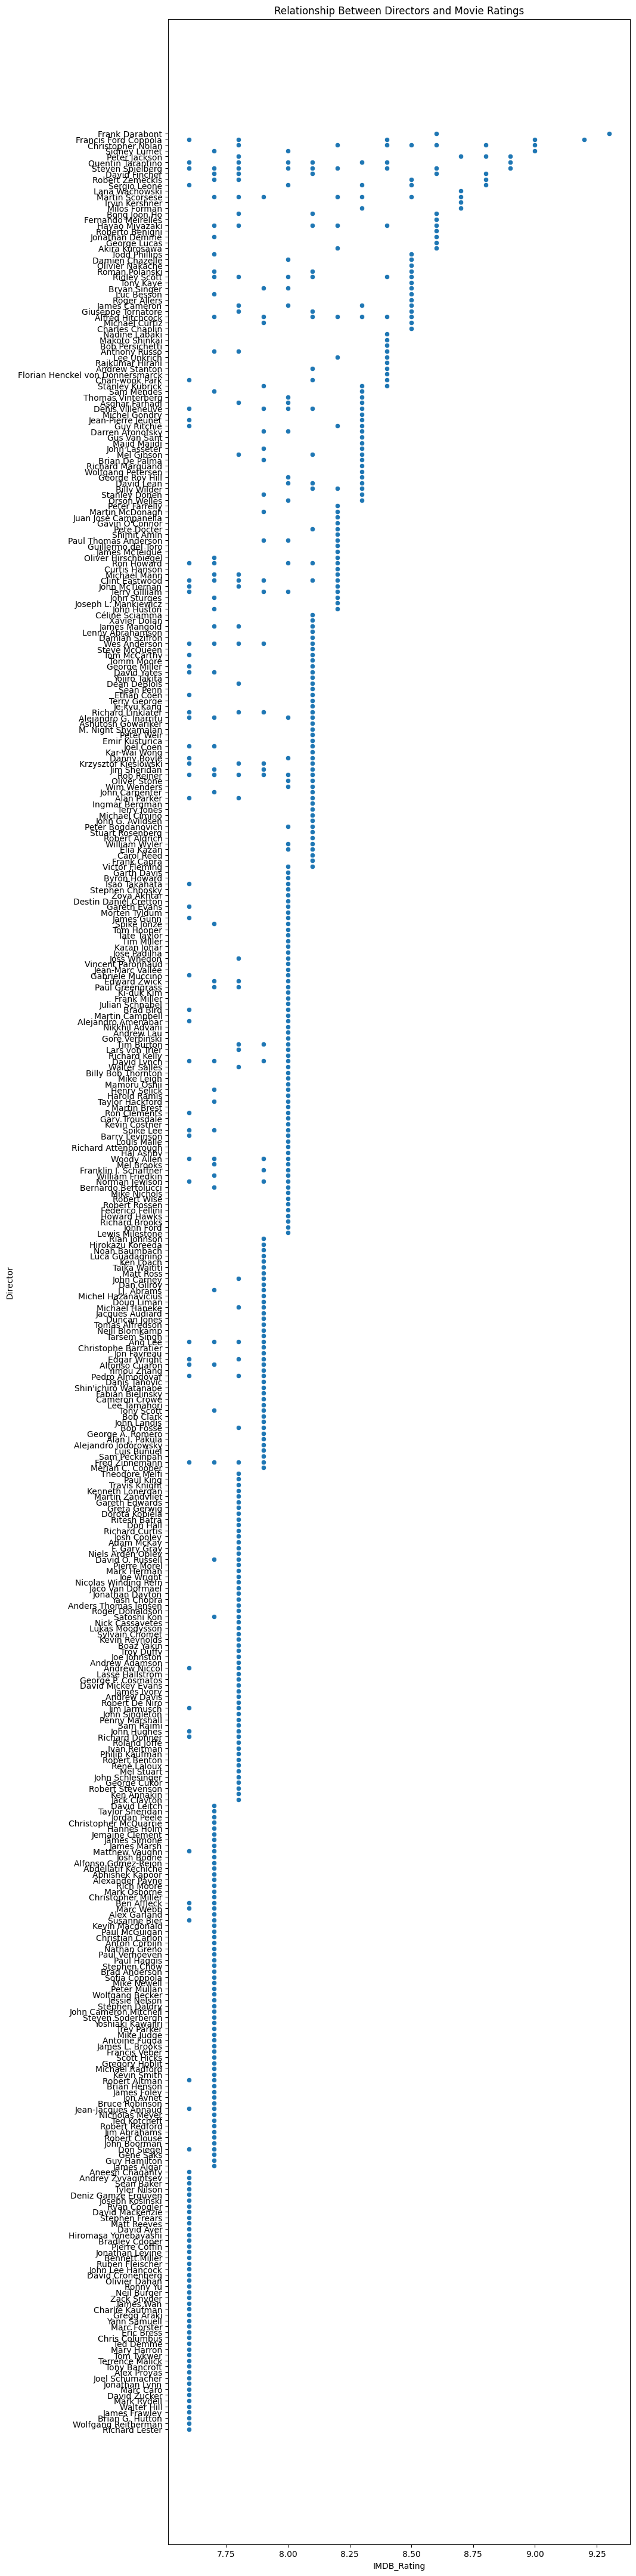

In [41]:
#  Matplotlib scatter plot to examine the relationship between directors and movie ratings
plt.figure(figsize=(10, 55))
sns.scatterplot(data=top_movies, x='IMDB_Rating', y='Director')
plt.title('Relationship Between Directors and Movie Ratings')
plt.xlabel('IMDB_Rating')
plt.ylabel('Director')
plt.show()

<Figure size 1200x800 with 0 Axes>

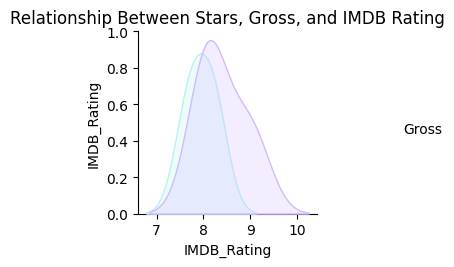

In [61]:
# a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross
plt.figure(figsize=(12, 8))
sns.pairplot(top_movies[['IMDB_Rating', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4']], diag_kind='kde', hue='Gross', palette='pastel')
plt.title('Relationship Between Stars, Gross, and IMDB Rating')
plt.show()

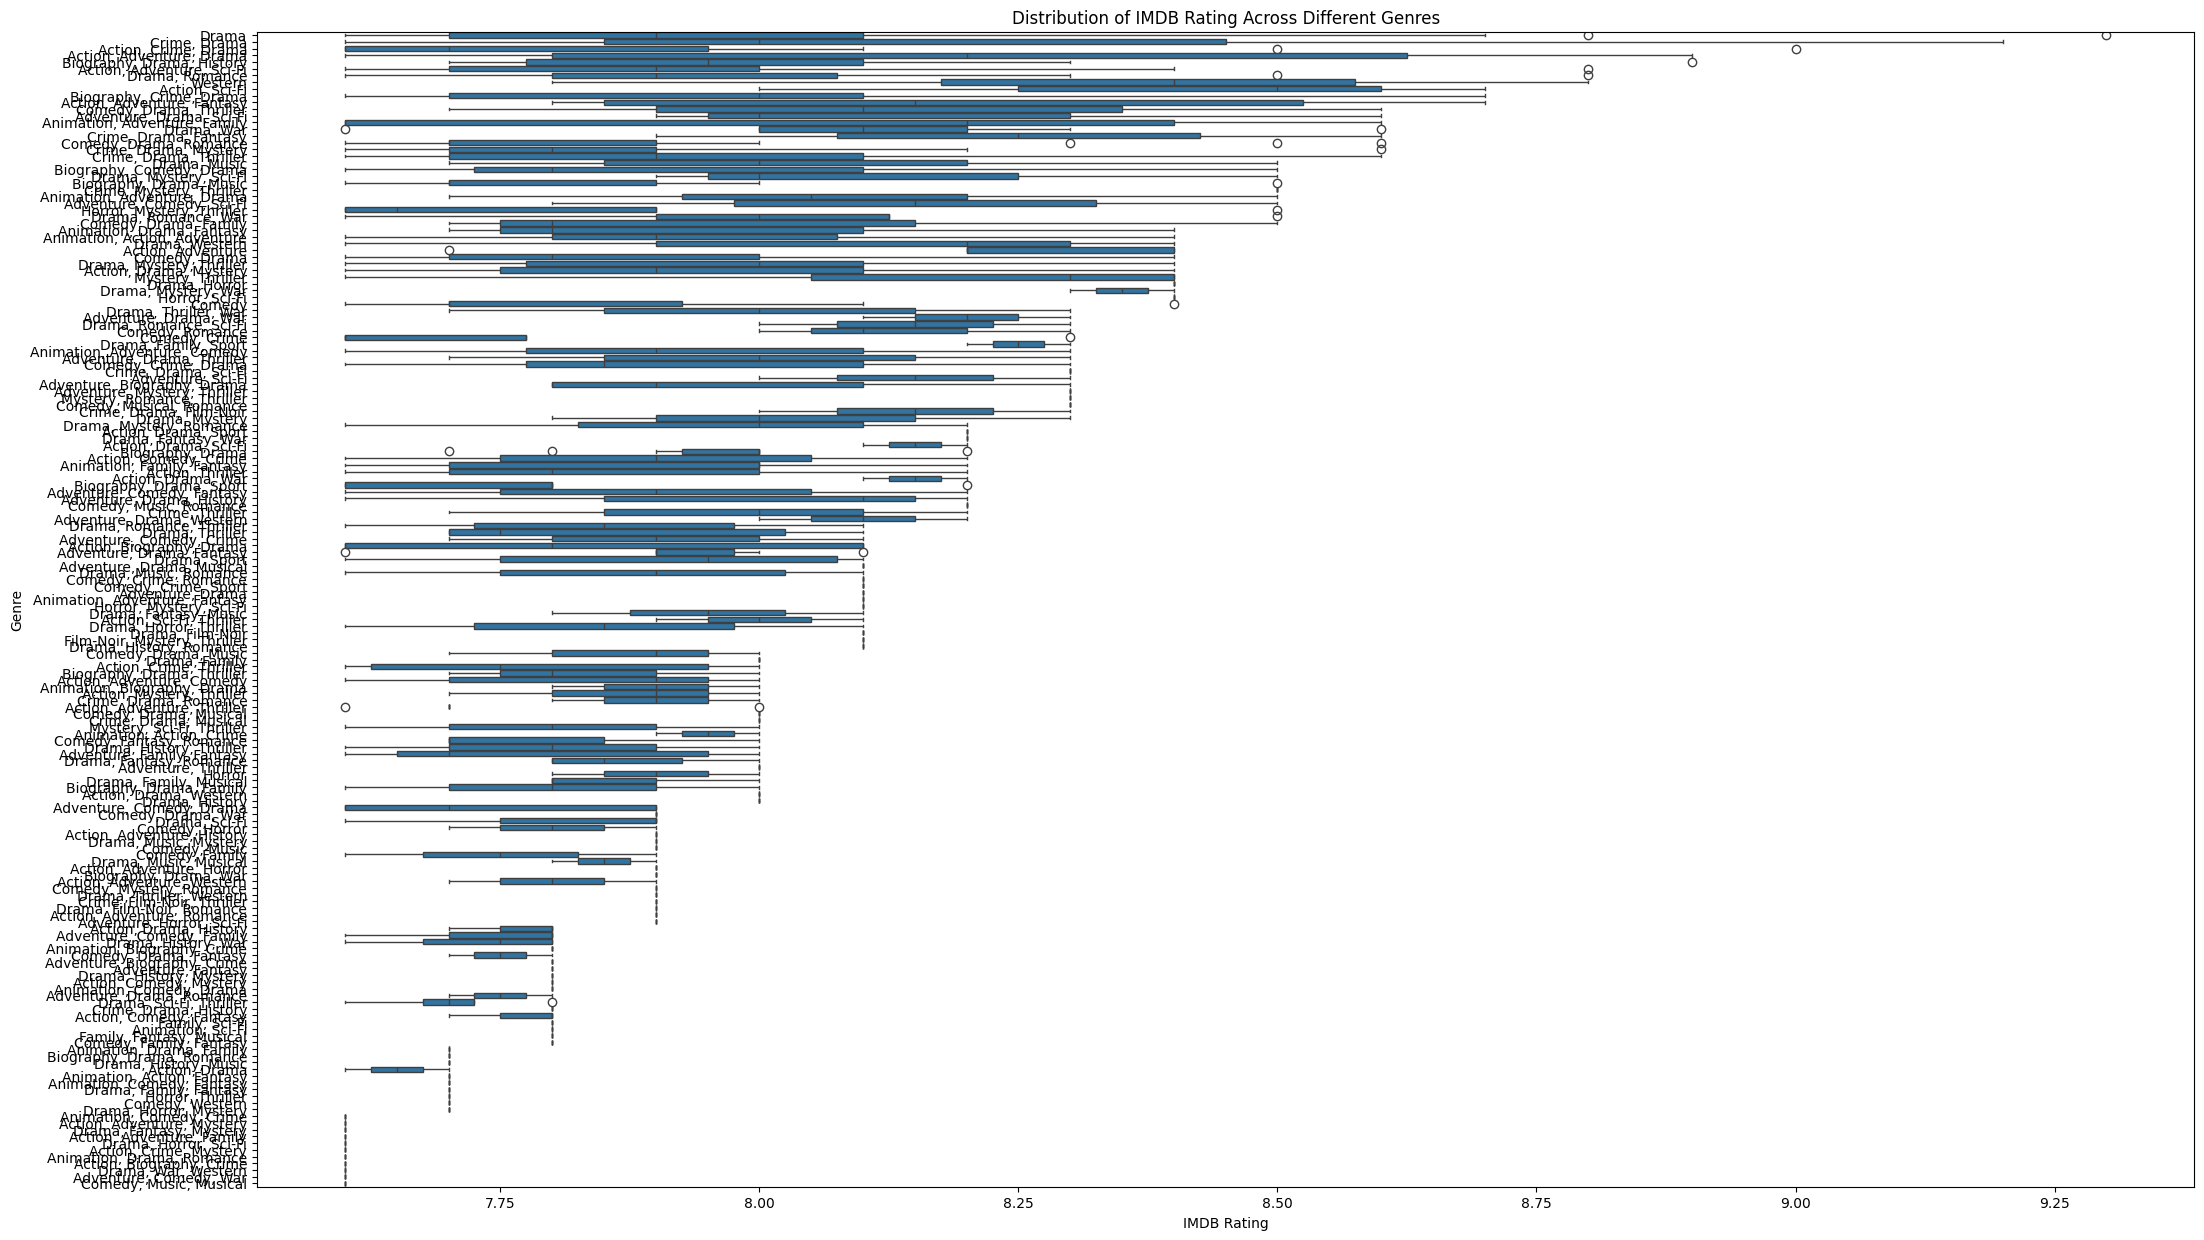

In [56]:
# distribution of IMDB_Rating across different Genres using a Seaborn box plot
plt.figure(figsize=(25, 15))
sns.boxplot(data=top_movies, x='IMDB_Rating', y='Genre')
plt.title('Distribution of IMDB Rating Across Different Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.show()

<ipython-input-59-fae45365b856>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top_movies[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr(), annot=True, cmap='coolwarm')


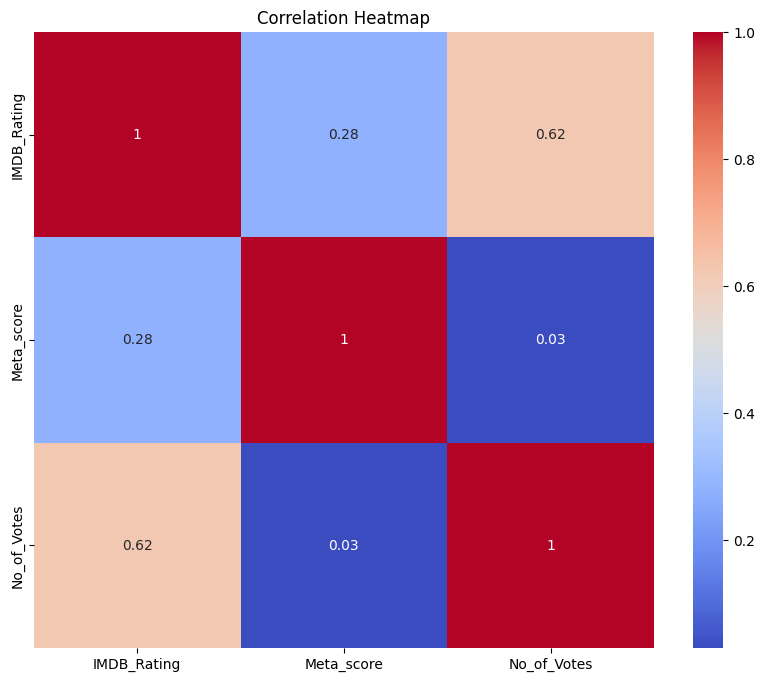

In [59]:
# heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross
plt.figure(figsize=(10, 8))
sns.heatmap(top_movies[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()